<a href="https://colab.research.google.com/github/hscrown/madatpublicdata/blob/main/collaborative_filtering_%EC%97%B0%EC%8A%B5(5)_%EC%9E%A0%EC%9E%AC%EC%9A%94%EC%9D%B8%EA%B8%B0%EB%B0%98_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

잠재요인기반 협업 필터링  

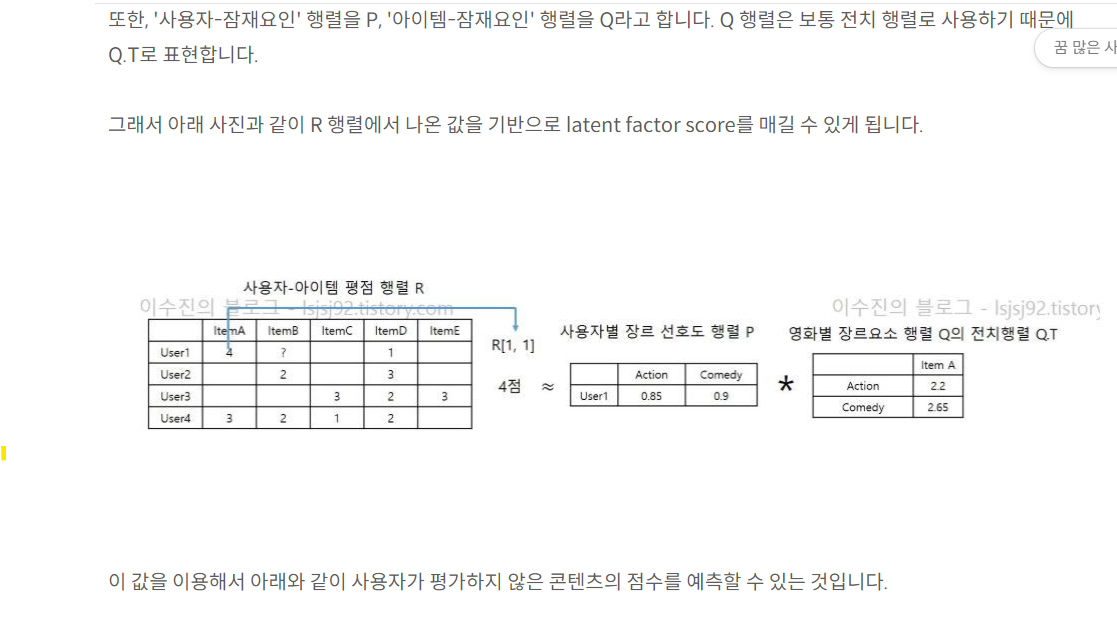

In [3]:
!pip install datasets
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


## 데이터로드 및 전처리

도서관데이터

In [9]:
# 필요한 컬럼 # 시설명, 구이름, 장소구분
lib = pd.read_csv('seoul_libs.csv', encoding='utf-8')
lib.head()

# 밸류값이 모두 'lib'인 ['type'] 칼럼 추가
lib['type'] = 'lib'

# 컬럼명 변경
cols= {'도서관 일련번호':'place_id', '도서관명':'place_name', '구명':'gu_name'}
lib = lib.rename(columns=cols)
lib.columns

# # 필요한 컬럼만 추출
lib=lib[['place_name', 'gu_name', 'type']]
lib.head()


,place_name,gu_name,type
0,BIBLIOTECA,강남구,lib
1,LH강남3단지작은도서관,강남구,lib
2,休+밤토리SH작은도서관,강남구,lib
3,강남구립못골도서관,강남구,lib
4,강남데시앙파크작은도서관,강남구,lib


공원데이터

In [10]:
# 필요한 컬럼 # 시설명, 구이름, 장소구분
par = pd.read_csv('seoul_parks.csv', encoding='utf-8')
par.head()
par.columns
# 밸류값이 모두 'par'인 ['type'] 칼럼 추가
par['type'] = 'par'

# 컬럼명 변경
cols= {'공원명':'place_name', '공원주소':'gu_name'}
par = par.rename(columns=cols)
par.columns

# 공원주소 컬럼에서 구 이름만 추출
par['gu_name'] = par['gu_name'].str.split(' ', expand=True)[1]

# 결측치 삭제
par = par.dropna()

# gu_name이 '구'로 끝나지 않으면 삭제
par = par[par['gu_name'].str.endswith('구')]

# # 필요한 컬럼만 추출
par=par[['place_name', 'gu_name', 'type']]
par.head()

,place_name,gu_name,type
0,남산도시자연공원,중구,par
12,여의도근린공원,영등포구,par
16,보라매근린공원,동작구,par
17,어린이대공원,광진구,par
18,천호근린공원,강동구,par


박물관, 미술관 데이터

In [11]:
dataset = load_dataset("hscrown/seoul_museums")
muse = pd.DataFrame(dataset['train'])

muse.columns

# 밸류값이 모두 'muse'인 ['type'] 칼럼 추가
muse['type'] = 'muse'

# 컬럼명 변경
cols= {'시설명':'place_name', '주소':'gu_name'}
muse = muse.rename(columns=cols)

# 주소 컬럼에서 구 이름만 추출
muse['gu_name'] = muse['gu_name'].str.split(' ', expand=True)[1]

# gu_name이 '구'로 끝나지 않으면 삭제
muse = muse[muse['gu_name'].str.endswith('구')]
# # 필요한 컬럼만 추출
muse=muse[['place_name', 'gu_name', 'type']]

muse.tail()

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/175 [00:00<?, ? examples/s]

,place_name,gu_name,type
170,매헌윤봉길의사기념관,서초구,muse
171,동덕여자대학교 박물관,성북구,muse
172,DDP디자인뮤지엄,중구,muse
173,아모레퍼시픽미술관,용산구,muse
174,롯데뮤지엄,송파구,muse


In [12]:
# 공원데이터와 도서관 데이터 합침
df = pd.concat([lib, par,muse])
df.tail()

# 인덱스 초기화
df = df.reset_index(drop=True)

# 'place_id' 컬럼 만들고 인덱스 밸류로 넣기
df['place_id'] = df.index

df.head()

# df 를 csv 파일로 변환
df.to_csv('places.csv', index=False, encoding='utf-8')

In [13]:
df.tail()

,place_name,gu_name,type,place_id
1658,매헌윤봉길의사기념관,서초구,muse,1658
1659,동덕여자대학교 박물관,성북구,muse,1659
1660,DDP디자인뮤지엄,중구,muse,1660
1661,아모레퍼시픽미술관,용산구,muse,1661
1662,롯데뮤지엄,송파구,muse,1662


# 사용자 평점데이터 만들기

In [14]:
# df 이용해서 사용자 평점데이터 만들기
# place_id,user_id,rating

# user 수 만큼 df 복사하기

user1 = df.copy()

user1.shape # (1663, 4)

user1.columns # ['place_name', 'gu_name', 'type', 'place_id']

# place_name 칼럼 삭제
user1.drop(columns='place_name', inplace=True)

# gu_name은 user_id로, type는 rating으로 컬럼명 변경
user1.columns = ['user_id', 'rating','place_id']
user1['user_id'] = 0

user2 = user1.copy()
user3 = user2.copy()

user2['user_id'] = 1
user3['user_id'] = 2

# user1, user2, user3 데이터 합치기

user_rating = pd.concat([user1, user2, user3])

user_rating

user_rating.columns # ['place_name', 'gu_name', 'type', 'place_id']
# rating 컬럼에 nan 값에 0 넣기
user_rating['rating'] = user_rating['rating'].fillna(0)

# rating 컬럼에 0~5 사이의 실수 랜덤값 넣기. 1의 자리에서 반올림
# numpy 사용
user_rating['rating'] = np.round(np.random.uniform(0, 5, size=len(user_rating)), 1)

user_rating.head()


,user_id,rating,place_id
0,0,4.1,0
1,0,4.1,1
2,0,4.4,2
3,0,2.1,3
4,0,3.7,4


아이템-특성 데이터 만들기

In [15]:
# place_id, type, place_name만 추출
item_feature = df[['place_id', 'type', 'place_name','gu_name']]
item_feature.head()

,place_id,type,place_name,gu_name
0,0,lib,BIBLIOTECA,강남구
1,1,lib,LH강남3단지작은도서관,강남구
2,2,lib,休+밤토리SH작은도서관,강남구
3,3,lib,강남구립못골도서관,강남구
4,4,lib,강남데시앙파크작은도서관,강남구


# 추천시스템구현

데이터확인

In [16]:
# 사용자-장소 평점기반데이터
user_rating.shape  # (4989, 3)

(4989, 3)

In [25]:
# 장소 정보 데이터
item_feature = item_feature[['place_id','place_name']]
item_feature

,place_id,place_name
0,0,BIBLIOTECA
1,1,LH강남3단지작은도서관
2,2,休+밤토리SH작은도서관
3,3,강남구립못골도서관
4,4,강남데시앙파크작은도서관
...,...,...
1658,1658,매헌윤봉길의사기념관
1659,1659,동덕여자대학교 박물관
1660,1660,DDP디자인뮤지엄
1661,1661,아모레퍼시픽미술관


In [26]:
user_place_data = pd.merge(user_rating, item_feature, on='place_id')
user_place_data.head()

,user_id,rating,place_id,place_name
0,0,4.1,0,BIBLIOTECA
1,1,0.8,0,BIBLIOTECA
2,2,1.9,0,BIBLIOTECA
3,0,4.1,1,LH강남3단지작은도서관
4,1,2.4,1,LH강남3단지작은도서관


In [27]:
user_place_data.shape # (4989, 4)

(4989, 4)

In [28]:
# 사용자-평점데이터로 변경
user_place_data = user_place_data.pivot_table(index='user_id', columns='place_name', values='rating')
user_place_data.head()

place_name,성신여자대학교자연사박물관,(사)국민문화연구소 자료실,(재)한원미술관,4.19혁명기념도서관,5세대sf작은도서관,63아트미술관,7단지 작은도서관,BIBLIOTECA,Book Bridge 작은 도서관,Book積북적도서관,...,휘경어린이도서관,휘경행복도서관,휴먼빌작은도서관,휴앤해피 작은도서관,흑석동작은도서관,흥부네작은도서관,희망문고,희망샘작은도서관,힐스테이트별빛작은도서관,힐즈도서관
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.2,1.4,1.3,0.5,2.6,3.8,2.6,4.1,4.0,0.1,...,4.1,0.8,0.8,4.1,1.8,1.7,3.9,0.2,1.0,2.6
1,2.8,4.4,1.4,4.6,2.2,4.8,0.7,0.8,2.3,3.2,...,4.3,1.2,1.1,3.3,2.7,3.7,2.0,1.0,2.8,1.7
2,3.3,1.4,1.8,3.7,0.3,2.9,4.9,1.9,0.5,0.4,...,4.3,3.4,2.5,4.9,3.0,2.4,4.8,3.7,2.9,2.1


In [31]:
# 전치
user_place_data = user_place_data.T
user_place_data.shape # (1623,3) # 1623개의 장소, 3명의 유저
user_place_data

user_id,0,1,2
place_name,,,
성신여자대학교자연사박물관,0.2,2.8,3.3
(사)국민문화연구소 자료실,1.4,4.4,1.4
(재)한원미술관,1.3,1.4,1.8
4.19혁명기념도서관,0.5,4.6,3.7
5세대sf작은도서관,2.6,2.2,0.3
...,...,...,...
흥부네작은도서관,1.7,3.7,2.4
희망문고,3.9,2.0,4.8
희망샘작은도서관,0.2,1.0,3.7


## 특이백터 SVD로 행렬복원
Scikit-learn의 TruncatedSVD사

In [41]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=3) # n_components는 latent 값, n_features 수 보다 같거나 작아야함
matrix = SVD.fit_transform(user_place_data) # 1623개의 장소데이터가 3만큼의 어떤 요소값을 같게됨
matrix.shape # (1623, 3)

(1623, 3)

In [35]:
matrix[0]

array([ 3.61452428, -0.54104378, -2.32647499])

In [42]:
# 이렇게 나온 matrix 값끼리 상관계수를 구함
corr = np.corrcoef(matrix)
corr.shape # (1623, 1623)

(1623, 1623)

<Axes: >

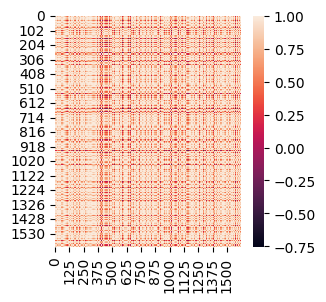

In [44]:
# 상관계수를 seaborn의 히트맵으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
sns.heatmap(corr)

In [50]:
# 특정 장소와 상관계수가 높은 장소뽑기
place_name = user_place_data.index
place_name_list = list(place_name)
# place_name_list

In [65]:
cos = place_name_list.index('희망문고')
corr_cos = corr[cos]
list(place_name[(corr_cos >= 0.9)])[:50]


['(재)한원미술관',
 '7단지 작은도서관',
 'BIBLIOTECA',
 'Book Bridge 작은 도서관',
 'CMS영어작은도서관',
 'DMC래미안e편한세상아파트1블럭작은도서관',
 'H HOUSE 라이브러리',
 'JCC아트센터',
 'K-Culture 작은도서관',
 'KCDF아카이브센터',
 'KOTRA무역자료실',
 'K현대미술관',
 'LH강남3단지작은도서관',
 'LH서초4단지작은도서관',
 'LH서초5단지작은도서관',
 'SC제일은행도서실',
 'THEBRIDGE작은도서관',
 'U+Library',
 'sk북카페꿈땅',
 '가락2동새마을문고(로즈마리작은도서관)',
 '가락몰도서관',
 '가락본동새마을문고(글향기작은도서관)',
 '가리봉동도서관',
 '가양9-1단지작은도서관',
 '가양도서관',
 '가온도서관',
 '가온작은도서관',
 '갈산도서관',
 '강남구립못골도서관',
 '강남역삼푸른솔도서관',
 '강남한신휴플러스8단지작은도서관',
 '강남한양수자인작은씨앗도서관',
 '강동구립도서관',
 '강동구립해공도서관',
 '강북삼성병원의학정보실',
 '강북청소년문화정보도서관',
 '강빛 은하수 작은도서관',
 '강일리버파크6단지책향기작은도서관',
 '개봉2동도서관',
 '개봉3동도서관',
 '개봉도서관',
 '개울건강도서관',
 '개포하늘꿈도서관',
 '거마도서관',
 '거여1동새마을문고',
 '거여3단지SH',
 '건국대학교박물관',
 '겨자씨작은도서관',
 '겸재정선미술관',
 '경동 1960 작은도서관']